<a href="https://colab.research.google.com/github/rvmarathe/mb_public/blob/main/inj3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reservoir Performance Depletion Drive Analysis

This notebook performs reservoir performance analysis for a depletion drive reservoir. It utilizes PVT data, production data, and relative permeability correlations to calculate and visualize key reservoir performance indicators such as cumulative oil production, reservoir pressure, gas-oil ratio (GOR), and instantaneous oil production rate.

## Notebook Structure

1. **Import Libraries**: Imports necessary libraries for numerical operations, data manipulation, plotting, and file handling.
2. **Load Input Files**: Uploads and loads data from "basic.txt", "prod.csv", and "pvt.csv" files containing basic reservoir parameters, production history, and PVT data, respectively.
3. **Process Input Data**: Extracts and processes the loaded data to calculate various parameters like effective compressibility and incremental/cumulative production quantities.
4. **Define Functions**: Defines functions for interpolating PVT data and calculating gas-oil ratio (GOR) based on different relative permeability correlations.
5. **Calculate Reservoir Performance**: Performs calculations to estimate reservoir pressure, GOR, cumulative gas production, and oil saturation over time, considering both undersaturated and saturated reservoir conditions.
6. **Summarize Results**: Creates a pandas DataFrame to store and display the calculated reservoir performance parameters in a tabular format.
7. **Visualize Results**: Generates a multi-axis plot to visualize the relationship between time, cumulative oil production, reservoir pressure, GOR, and instantaneous oil production rate.

## Input Files

- `basic.txt`: Contains basic reservoir parameters.
- `prod.csv`: Contains production history data with columns for TIME, ANP (cumulative oil production), QINJ (water injection rate), and WP (cumulative water production).
- `pvt.csv`: Contains PVT data with columns for P (pressure), BO (oil formation volume factor), BG (gas formation volume factor), RS (solution gas-oil ratio), AMEO (oil viscosity), and AMEG (gas viscosity).

## Output

The notebook outputs a table summarizing the calculated reservoir performance parameters and a plot visualizing the reservoir's performance over time.

# Python program for pvt correlations(standing)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import math as m


In [ ]:
from google.colab import files

In [ ]:

#below line will remove all txt and csv files from working directory
!rm *.csv *.txt
files=files.upload()

rm: cannot remove '*.csv': No such file or directory
rm: cannot remove '*.txt': No such file or directory


Saving basic.txt to basic.txt
Saving prod.csv to prod.csv
Saving pvt.csv to pvt.csv


In [ ]:
#arr1=np.genfromtxt("l1.txt", delimiter=',')
#arr1=np.genfromtxt("sh1.txt", delimiter=',')
arr1=np.genfromtxt("basic.txt", delimiter=',')
EM=arr1[0,0]         #gas cap size ratio of gas -cap size to oil rim size GBgi/Nboi
AIOIP=arr1[0,1]     #initialoil in place m3
PINIT=arr1[0,2]     # initial reservoir pressure
BOI=arr1[0,3]        #oil fvf at initial pressure
CO=arr1[0,4]        #oil compressibility ksc-1 compaible with boi and bo at saturation pressure
CW=arr1[0,5]        #water copmpreesibility ksc-1 default standard numnber
CF= arr1[0,6]        #rock compressibilty ksc-1 default standard number
SWI=arr1[1,0]       #initial water satration
SOR=arr1[1,1]       # sor to gas displacement
SGC=arr1[1,2]       #critical gas saturation
GKSORG=arr1[1,3]         #maximum krg at maximumn=m ga saturation
IFL=int(arr1[1,4])     #flag for relative permeabilty curve 1 modest, 3 strong
AK=arr1[1,5]         # average field permeability also required in some rel perm correlations
PHI=arr1[1,6]         #avearge pososity some rel perm corelations require it


In [ ]:
print(EM)

0.0


In [ ]:
#data= pd.read_csv('pvtsh.csv')
#data= pd.read_csv('l1pvt.csv')
data= pd.read_csv('pvt.csv')
print(data)

            P        BO        BG          RS      AMEO      AMEG
0   124.00000  1.479300  0.008621  129.231000  0.526571  0.018255
1   115.80200  1.452899  0.009309  119.153105  0.548692  0.017549
2   107.60400  1.427160  0.010119  109.218071  0.573143  0.016884
3    99.40660  1.402094  0.011082   99.434433  0.600321  0.016260
4    91.20890  1.377743  0.012237   89.811985  0.630722  0.015681
5    83.01110  1.354120  0.013639   80.361922  0.664967  0.015145
6    74.81330  1.331266  0.015367   71.097535  0.703845  0.014654
7    66.61550  1.309215  0.017539   62.034076  0.748371  0.014205
8    58.41770  1.287999  0.020337   53.190994  0.799868  0.013799
9    50.21990  1.267683  0.024066   44.591797  0.860085  0.013432
10   42.02220  1.248322  0.029267   36.266708  0.931359  0.013103
11   33.82440  1.230002  0.037006   28.256303  1.016830  0.012811
12   25.62660  1.212832  0.049712   20.617672  1.120680  0.012556
13   17.42880  1.196974  0.074390   13.438895  1.248150  0.012336
14    9.23

In [ ]:
P=data['P'].values
print(P)
print(P[0])
BO= data['BO'].values
BG= data['BG'].values
BO1=BO[0]
print(BO1)
COE=CO+(CW*SWI/(1.0-SWI))+(CF/(1.0-SWI))
print('Total effective compressibility in ksc-1=',COE)

RS= data['RS'].values
RSB= RS[0]

[124.      115.802   107.604    99.4066   91.2089   83.0111   74.8133
  66.6155   58.4177   50.2199   42.0222   33.8244   25.6266   17.4288
   9.23102   1.03323]
124.0
1.4793
Total effective compressibility in ksc-1= 0.00027959999999999997


In [ ]:
#prod=pd.read_csv('l1_inp.csv')
#prod=pd.read_csv('sh1_inp.csv')
prod=pd.read_csv('prod.csv')
print(prod)
NTYR=prod.shape[0]
print(' total time steps=', NTYR)
ANP= prod['ANP'].values
WP = prod['WP'].values

    TIME   ANP  QINJ    WP
0    365  1170     0   287
1    730  1542     0   300
2   1095  1654     0   318
3   1460  1955     0   370
4   1825  2541     0   623
5   2190  3082     0   802
6   2555  3299     0   846
7   2920  3625     0  1022
8   3285  3782     0  1130
9   3650  3932     0  1294
10  4015  4058     0  1394
11  4380  4157     0  1408
12  4745  4251     0  1466
13  5110  4337     0  1468
 total time steps= 14


In [ ]:
# Compute time differences
prod['time_diff'] = prod['TIME'].diff().fillna(0)

# Compute incremental quantities
prod['incremental_qty'] = prod['time_diff'] * prod['QINJ']

# Compute cumulative quantity
prod['WI'] = prod['incremental_qty'].cumsum()

# Drop intermediate column if not needed
prod.drop(columns=['time_diff', 'incremental_qty'], inplace=True)
print(prod)

    TIME   ANP  QINJ    WP   WI
0    365  1170     0   287  0.0
1    730  1542     0   300  0.0
2   1095  1654     0   318  0.0
3   1460  1955     0   370  0.0
4   1825  2541     0   623  0.0
5   2190  3082     0   802  0.0
6   2555  3299     0   846  0.0
7   2920  3625     0  1022  0.0
8   3285  3782     0  1130  0.0
9   3650  3932     0  1294  0.0
10  4015  4058     0  1394  0.0
11  4380  4157     0  1408  0.0
12  4745  4251     0  1466  0.0
13  5110  4337     0  1468  0.0


In [ ]:
TIME=prod['TIME'].values
QO=[]
for i in range (NTYR):
    if i == 0:
        rate=ANP[i]/TIME[i]
    else:
        rate=(ANP[i]-ANP[i-1])/(TIME[i]-TIME[i-1])
    QO.append(rate)
#print(QO)
prod['QO']=QO
WI=prod['WI'].values
prod['istep']=prod.index
print(prod)

    TIME   ANP  QINJ    WP   WI        QO  istep
0    365  1170     0   287  0.0  3.205479      0
1    730  1542     0   300  0.0  1.019178      1
2   1095  1654     0   318  0.0  0.306849      2
3   1460  1955     0   370  0.0  0.824658      3
4   1825  2541     0   623  0.0  1.605479      4
5   2190  3082     0   802  0.0  1.482192      5
6   2555  3299     0   846  0.0  0.594521      6
7   2920  3625     0  1022  0.0  0.893151      7
8   3285  3782     0  1130  0.0  0.430137      8
9   3650  3932     0  1294  0.0  0.410959      9
10  4015  4058     0  1394  0.0  0.345205     10
11  4380  4157     0  1408  0.0  0.271233     11
12  4745  4251     0  1466  0.0  0.257534     12
13  5110  4337     0  1468  0.0  0.235616     13


In [ ]:
def ratio(SG, IFL):
    """"
    Function to get kg/ko at a given gas saturation
    usese three differen types of re perm curves
    ifl=1 mild rises of Gor
    ifl=2 and 3 quick rise in gor as in carbonate reservoirs
    input:
    SG: gas saturation and IFL
    other variabls SWI, SOR ,GKSORG etc.are global variables read in as txt file
    """
    SO= 1.0-SG -SWI
    SMIN= 1.0-SWI-SOR
    if IFL == 1:
        A=(1.0-SGC-SWI-SO)/(SO-SOR)
        RATIO=A*(0.04335+0.4556*A)
        return RATIO
    elif IFL==2:
        OK=((SO-SOR)**2)/(SMIN**2)
        GK=GKSORG*((SG-SGC)**2)/((SMIN-SGC)**2)
        if SG <  SGC:
            GK=0.0
            RATIO=0.0
            return RATIO
        else:
            RATIO=GK/OK
            return RATIO
    else:

        OK=0.98372*(SO/(1.-SWI))**4*((SO-SOR)/(1.-SWI-SOR))**2
        GK=1.1072*((SG-SGC)/(1.-SWI))**2*GKSORG+2.7794*SOR*((SG-SGC)/(1.-SWI))*GKSORG
        if SG < SGC:
            GK=0.0
            RATIO=0.0
            return RATIO
        else:
            RATIO=GK/OK
            return RATIO

In [ ]:
def polate_pvt( data, x_new1):
    X= data['P'].values

    # Create individual interpolators for each column
    interp_bo = interp1d(X, data['BO'].values, kind='linear', fill_value='extrapolate')
    interp_bg = interp1d(X, data['BG'].values, kind='linear', fill_value='extrapolate')
    interp_rs = interp1d(X, data['RS'].values, kind='linear', fill_value='extrapolate')
    interp_visco= interp1d(X, data['AMEO'].values, kind='linear', fill_value='extrapolate')
    interp_mug = interp1d(X, data['AMEG'].values, kind='linear', fill_value='extrapolate')

    # Define the new X value for interpolation


    boc = interp_bo(x_new1)


    bgc = interp_bg(x_new1)


    rsc = interp_rs(x_new1)

    viscoc = interp_visco(x_new1)


    mugc1 = interp_mug(x_new1)

    return boc,bgc,rsc,viscoc, mugc1

In [ ]:
xnew_2=55.0
boc,bgc,rsc,ameoc,mugc = polate_pvt( data, xnew_2)
print('boc=  ',boc)
print('bgc  =',bgc)
print('rsc  =',rsc)
print('ameoc=',ameoc)
print('amegc=',mugc)

boc=   1.2795291794606725
bgc  = 0.021891771658261977
rsc  = 49.60595022604979
ameoc= 0.8249727404059626
amegc= 0.013645779416428798


In [ ]:
pr = np.zeros(NTYR, float)
gor= np.zeros(NTYR, float)
gp=np.zeros(NTYR,float)
sou1= np.zeros(NTYR,float)
oilp=ANP
print(sou1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
if EM == 0:
    for istep in range(NTYR):
        if istep == 0:
          p=PINIT
        else:
          p=pr[i-1]
        delp=0.1
        toll=0.01
        k=0
        while True:
            p=p-0.1
            BOC=BOI*(1.0+CO*(PINIT-p))     #current BO at p
            rhs=ANP[istep]*BOC+WP[istep]-WI[istep]
            lhs=AIOIP*BOI*(COE*(PINIT-p))# expansion of rock and oil volume
            rat=rhs/lhs
            diff=1-rat


            if k % 10 == 0:
                #print( "we are in udersaturated pressure regime in iteration")
                print(k,rhs,lhs,p,diff)
            if abs(diff)< toll or  diff > 0  :
                pr[istep]=p
                gp[istep]=ANP[istep]*RS[0]
                gor[istep]=RS[0]
                sou1[istep]=1-SWI
                break
            k= k+1
        if p <= P[0]:
            istepb=istep
            print('istepb=',istepb)
            print(' We are now below saturation pressure')

            break
    print ('current value of istep=',istep)
    print ('value of istepb=', istepb)

    recb=(AIOIP*BOI*(COE*(PINIT-P[0]))+ WI[istepb]-WP[istepb])/BO[0]

    gasb=recb*RS[0]
    wib=WI[istepb]
    wpb=WP[istepb]
    oilp=ANP-recb
    WI1= WI-wib
    WP1= WP-wpb
    print(' value of expected recovery upto pb=', recb)




    for istep in range(istepb,NTYR):  # Calculations below (< pb) bubble point start from here
        print(' We are now below saturation pressure')
        print('istep=',istep)

        delp=0.1
        toll=0.01
        SO=1.0-SWI

        if istep == istepb:
            p=P[0]

        else:
            p= pr[istep-1]
        k=0
        while True:
            p=p-0.01
            boc,bgc,rsc,ameoc,mugc = polate_pvt( data, p)
            a1=(AIOIP-ANP[istep])*boc-(WI1[istep]-WP1[istep])*(SOR/(1.0-SWI-SOR))
            D2=(AIOIP*BOI*(1-((CW*SWI+CF*SO)/SO*(PINIT-p))))/SO
            b1=D2-((WI[istep]-WP[istep])/(1-SWI-SOR))
            sou=a1/b1
            SG=1.0-SWI-sou
            rat=ratio(SG,IFL) # work out kg/ko ratio at sg for ifl type rel perm curve
            fact=((boc/bgc)*(ameoc/mugc))*rat
            #print('p= ',p,'SG=',SG, ' fact=  ',fact)
            gorn=rsc + fact
            if istep ==0:
                gasp=(gorn+RS[0])*0.5*ANP[0]
                term=0.5*oilp[0]
            else:
                delnp=ANP[istep]-ANP[istep-1]
                term=((gorn+gor[istep-1])*delnp)
                gasp=gp[istep-1]+0.5*term

            bt=boc-(rsc-RS[0])*bgc
            anum=(oilp[istep]*bt) +  (gasp*bgc)-(oilp[istep]*RS[0]*bgc)-WI1[istep]+WP1[istep]
            D3=(BO1*(CW*SWI+CF)*(P[0]-p)/(1-SWI))  # rock and water expansion term
            aden=AIOIP*((bt-BO1)+(EM*BO1*(bgc-BG[0])/BG[0])+D3)
            #print('anum=', anum,'      aden=',aden)
            rat=anum/aden
            diff1=1-rat
            if k % 10 == 0:
                print(k,anum,aden,gasp,p,diff1,rat)
            if abs(diff1) < toll or diff1 > 0 :
                pr[istep]=p
                gp[istep]=gasp
                gor[istep]=gorn
                sou1[istep]=sou
                break
            k= k+1




else:                           #the case where the reservoir is saturated EM==0

    for istep in range(NTYR):
        print('EM  we are talking of sturated reservori from day one gascapsize =', EM)
        delp=0.1
        toll=0.01
        SO=1.0-SWI
        if istep ==0:
             p=P[0]
        else:
            p=pr[istep-1]
            print('istep=  ',istep, 'p=  ',p)
        k=0
        while True:
            p=p-0.01
            boc,bgc,rsc,ameoc,mugc = polate_pvt( data, p)
            a1=(AIOIP-ANP[istep])*boc-(WI[istep]-WP[istep])*(SOR/(1.0-SWI-SOR))
            D2=(AIOIP*BOI*(1-((CW*SWI+CF*SO)/SO*(PINIT-p))))/SO
            b1=D2-((WI[istep]-WP[istep])/(1-SWI-SOR))
            sou=a1/b1
            SG=1.0-SWI-sou
            rat=ratio(SG,IFL) # work out kg/ko ratio at sg for ifl type rel perm curve
            fact=((boc/bgc)*(ameoc/mugc))*rat
            #print('p= ',p,'SG=',SG, ' fact=  ',fact)
            gorn=rsc + fact
            if istep ==0:
                gasp=(gorn+RS[0])*0.5*ANP[0]
                term=0.5*ANP[0]
            else:
                delnp=ANP[istep]-ANP[istep-1]
                term=((gorn+gor[istep-1])*delnp)
                gasp=gp[istep-1]+0.5*term

            bt=boc-(rsc-RS[0])*bgc
            anum=(ANP[istep]*bt) +  (gasp*bgc)-(ANP[istep]*RS[0]*bgc)-WI[istep]+WP[istep]
            D3=(BO1*(CW*SWI+CF)*(P[0]-p)/(1-SWI))  # rock and water expansion term
            aden=AIOIP*((bt-BO1)+(EM*BO1*(bgc-BG[0])/BG[0])+D3)
            #print('anum=', anum,'      aden=',aden)
            rat=anum/aden
            diff1=1-rat
            if k % 10 == 0:
                print(k,anum,aden,gasp,p,diff1,rat)
            if abs(diff1) < toll or diff1 > 0 :
                pr[istep]=p
                gp[istep]=gasp
                gor[istep]=gorn
                sou1[istep]=sou
                break
            k= k+1



0 2002.4811041731998 16.397980799999065 179.9 -121.11754170204382
10 2002.7521459051998 180.3777887999897 178.90000000000006 -10.103097333818265
20 2003.0231876371995 344.3575967999804 177.90000000000012 -4.8166952210456175
30 2003.2942293692 508.337404799971 176.90000000000018 -2.9408751165133897
40 2003.5652711011996 672.3172127999617 175.90000000000023 -1.9800892093139546
50 2003.8363128331998 836.2970207999523 174.9000000000003 -1.396082089251554
60 2004.1073545651996 1000.276828799943 173.90000000000035 -1.0035527134719064
70 2004.3783962972 1164.2566367999336 172.9000000000004 -0.7215949928414565
80 2004.6494380291997 1328.2364447999244 171.90000000000046 -0.5092564624901292
90 2004.9204797611997 1492.2162527999149 170.90000000000052 -0.34358574100722605
100 2005.1915214931996 1656.1960607999056 169.90000000000057 -0.21072110298628366
110 2005.4625632251998 1820.1758687998963 168.90000000000063 -0.1017960393835291
120 2005.7336049571995 1984.1556767998868 167.9000000000007 -0.010

In [ ]:
temp1=pd.DataFrame()
temp1=pd.DataFrame(columns=['TIME','oilp','qo','pr','sou','gor','gp','wi','wp'])
temp1['TIME']=TIME/365
temp1['oilp']=ANP
temp1['qo']=QO
temp1['pr']=pr
temp1['sou']=sou1
temp1['gor']=gor
temp1['gp']=gp/1.E09
temp1['wp']=WP
temp1['wi']=WI
print(temp1.round(3))

    TIME  oilp     qo      pr    sou      gor     gp   wi    wp
0    1.0  1170  3.205  167.80  0.620  129.231  0.000  0.0   287
1    2.0  1542  1.019  123.97  0.626  129.194  0.000  0.0   300
2    3.0  1654  0.307  123.91  0.625  129.120  0.000  0.0   318
3    4.0  1955  0.825  123.74  0.625  128.911  0.000  0.0   370
4    5.0  2541  1.605  123.37  0.623  128.457  0.000  0.0   623
5    6.0  3082  1.482  123.06  0.621  128.075  0.000  0.0   802
6    7.0  3299  0.595  122.94  0.621  127.928  0.000  0.0   846
7    8.0  3625  0.893  122.73  0.620  128.010  0.000  0.0  1022
8    9.0  3782  0.430  122.62  0.619  129.473  0.000  0.0  1130
9   10.0  3932  0.411  122.49  0.619  131.173  0.001  0.0  1294
10  11.0  4058  0.345  122.40  0.618  132.434  0.001  0.0  1394
11  12.0  4157  0.271  122.35  0.618  133.146  0.001  0.0  1408
12  13.0  4251  0.258  122.28  0.618  134.053  0.001  0.0  1466
13  14.0  4337  0.236  122.24  0.618  134.634  0.001  0.0  1468


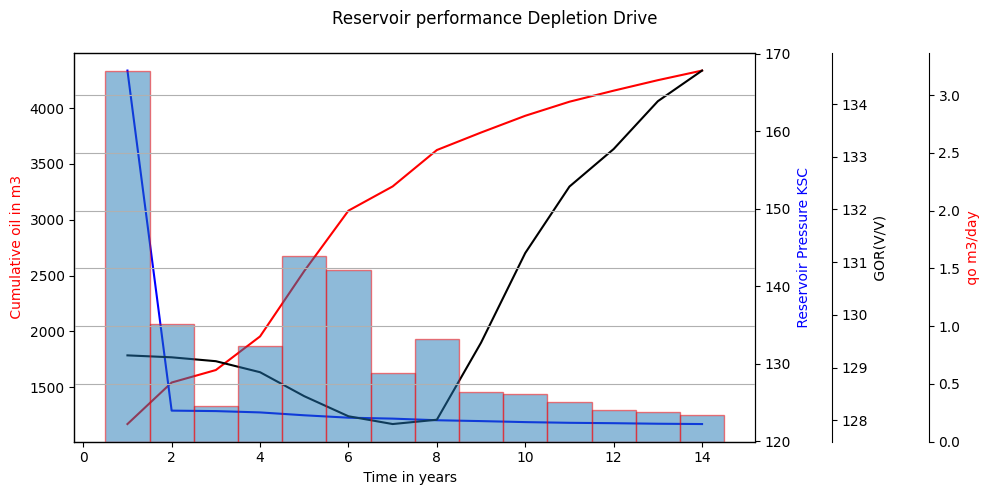

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax1= plt.subplots(1, 1, figsize=(10,5))
# Set background color to yellow
ax1.set_facecolor('white')

ax1.set_xlabel(' Time in years   ')
ax1.set_ylabel(' Cumulative oil in m3 ',color='red')
ax1.plot(temp1.TIME,temp1.oilp,color='red',label='Np')
ax1.tick_params(axis='y')                          #,labelcolor='tab:red')
ax2=ax1.twinx()
ax2.set_ylabel(' Reservoir Pressure KSC ',color='blue')
ax2.plot(temp1.TIME,temp1.pr,color='blue',label='Pbar')
ax2.tick_params(axis='y')                           #labelcolor='tab:blue')
ax3=ax1.twinx()
ax3.set_ylabel(' GOR(V/V) ',color='black')
ax3.plot(temp1.TIME,temp1.gor,color='black',label='GOR(v/v)')
ax3.spines['right'].set_position(('outward',55))
ax3.tick_params(axis='y')
ax4=ax1.twinx()
ax4.set_ylabel(' qo m3/day ',color='red')

ax4.bar(temp1.TIME,temp1.qo,edgecolor='red', alpha=0.5, width=1, label='qo m3/day')
ax4.spines['right'].set_position(('outward',125))
ax4.tick_params(axis='y')
fig.suptitle('Reservoir performance Depletion Drive') #, fontsize=16)
fig.tight_layout()
plt.grid()
plt.show()